In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
        'weight' : 'normal'}

matplotlib.rc('font', **font)
from afrc.polymer_models.saw import SAW
from afrc.polymer_models.wlc import WormLikeChain
from afrc.polymer_models.wlc2 import WormLikeChain2
from afrc.polymer_models.nudep_saw import NuDepSAW
from afrc import AnalyticalFRC

In [2]:
seq='A'*100

In [3]:
saw_m = SAW(seq)
wlc_m = WormLikeChain2(seq)
afrc_m = AnalyticalFRC(seq)
nudepsaw_m = NuDepSAW(seq)

meta NOT subset; don't know how to subset; dropped


SAW: 86.36315476269738
WLC: 43.98496211726622
AFRC: 60.381


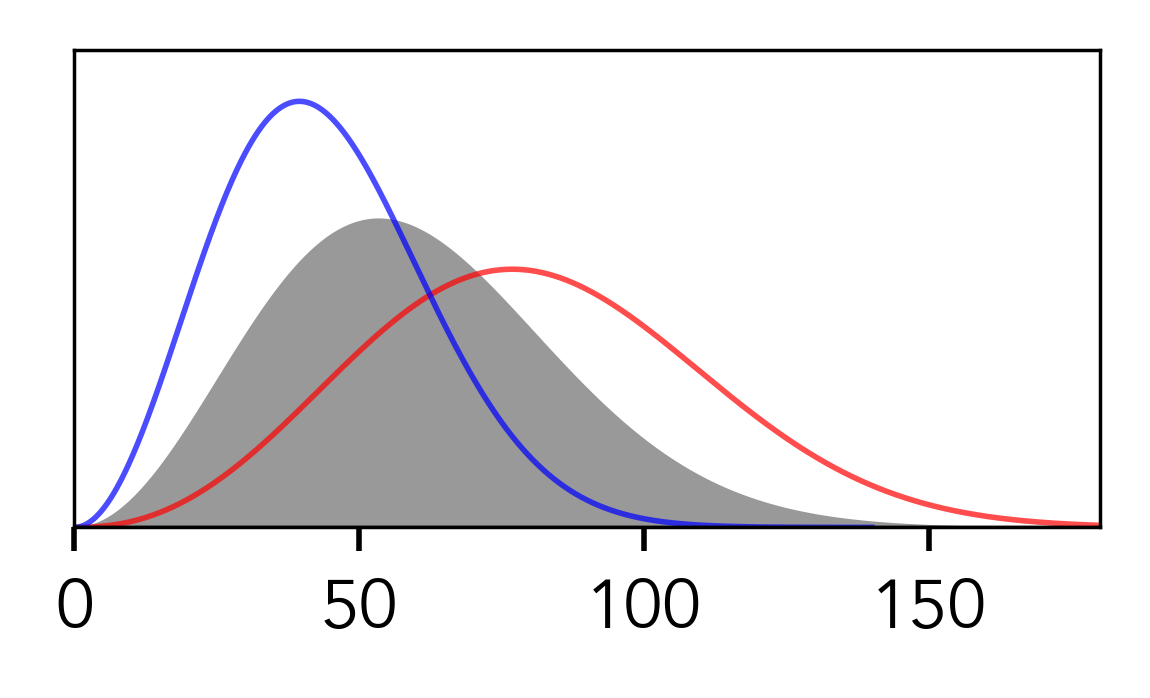

In [4]:
fig = figure(num=None, figsize=(2.4, 1.5), dpi=250, facecolor='w', edgecolor='k')

e2e_d = saw_m.get_end_to_end_distribution()
print(f"SAW: {saw_m.get_mean_end_to_end_distance()}")
plt.plot(e2e_d[0], e2e_d[1], color='r', linewidth=0.8, alpha=0.7)

e2e_d = wlc_m.get_end_to_end_distribution()
print(f"WLC: {wlc_m.get_mean_end_to_end_distance()}")
plt.plot(e2e_d[0], e2e_d[1], color='b', linewidth=0.8, alpha=0.7)


e2e_d = afrc_m.get_end_to_end_distribution()
print(f"AFRC: {afrc_m.get_mean_end_to_end_distance()}")
plt.fill_between(e2e_d[0], e2e_d[1], color='k', linewidth=0., alpha=0.4)



plt.plot([0,400],[0,0],color='k', linewidth=0.5)
plt.xlim([0,180])
plt.ylim([0,0.0012])
plt.yticks([])
plt.tight_layout()
plt.savefig('saw_wcl_afrc.pdf')

meta NOT subset; don't know how to subset; dropped


nu-dep SAW (0.33): 38.397417427853
nu-dep SAW (0.50): 61.403216195551124
nu-dep SAW (0.589): 80.18411575442985
AFRC: 60.381


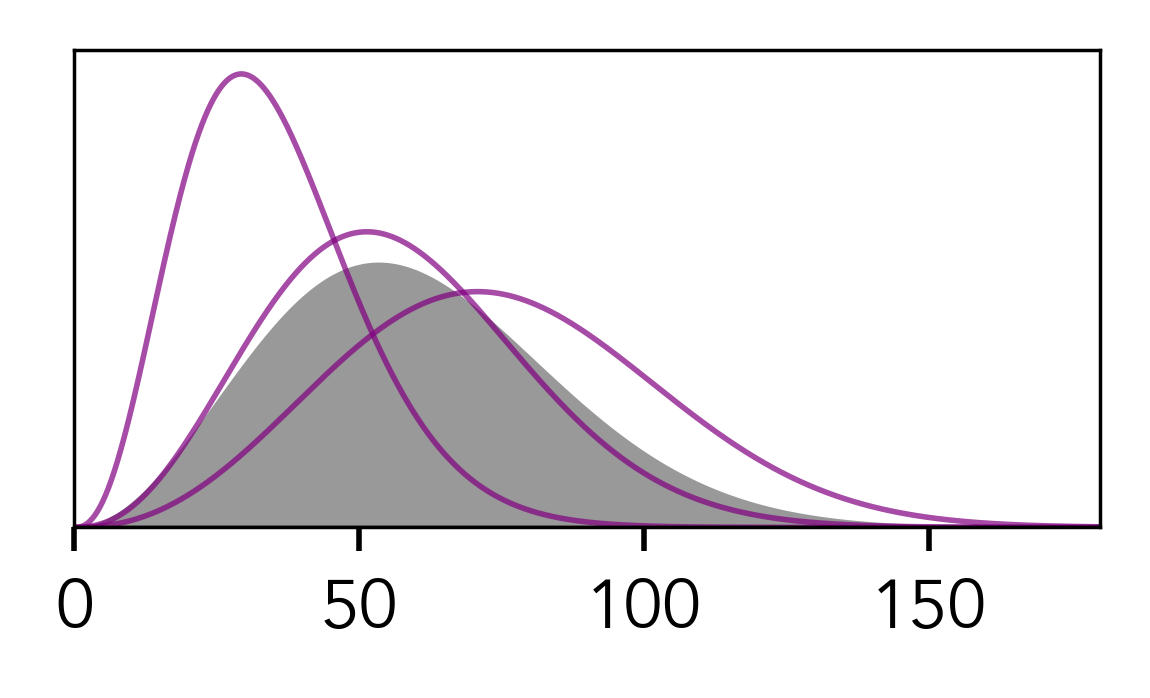

In [5]:
fig = figure(num=None, figsize=(2.4, 1.5), dpi=250, facecolor='w', edgecolor='k')


e2e_d = nudepsaw_m.get_end_to_end_distribution(nu=0.33,)
print(f"nu-dep SAW (0.33): {nudepsaw_m.get_mean_end_to_end_distance(nu=0.33)}")
plt.plot(e2e_d[0], e2e_d[1], color='purple', linewidth=0.8, alpha=0.7)

e2e_d = nudepsaw_m.get_end_to_end_distribution(nu=0.5,)
print(f"nu-dep SAW (0.50): {nudepsaw_m.get_mean_end_to_end_distance(nu=0.5)}")
plt.plot(e2e_d[0], e2e_d[1], color='purple', linewidth=0.8, alpha=0.7)

e2e_d = nudepsaw_m.get_end_to_end_distribution(nu=0.589,)
print(f"nu-dep SAW (0.589): {nudepsaw_m.get_mean_end_to_end_distance(nu=0.589)}")
plt.plot(e2e_d[0], e2e_d[1], color='purple', linewidth=0.8, alpha=0.7)

e2e_d = afrc_m.get_end_to_end_distribution()
print(f"AFRC: {afrc_m.get_mean_end_to_end_distance()}")
plt.fill_between(e2e_d[0], e2e_d[1], color='k', linewidth=0., alpha=0.4)



plt.plot([0,400],[0,0],color='k', linewidth=0.5)
plt.xlim([0,180])
plt.ylim([0,0.0014])

plt.yticks([])
plt.tight_layout()
plt.savefig('nu_saw_afrc.pdf')

In [6]:
LENGTHS = np.arange(20,500,20)
RG_SAW = []
RG_SAW_NU = []
RG_WLC = []
RG_AFRC = []

NU2RG = {}
NUs=  [0.33,0.4,0.45,0.5,0.55,0.598]

for nu in NUs:
    NU2RG[nu] = [] 

for l in LENGTHS:
    seq = 'A'*l
    RG_SAW.append(SAW(seq).get_mean_radius_of_gyration())
    RG_WLC.append(WormLikeChain2(seq).get_mean_radius_of_gyration())
    RG_AFRC.append(AnalyticalFRC(seq).get_mean_radius_of_gyration())
    
    for nu in NUs:
         NU2RG[nu].append(NuDepSAW(seq).get_mean_radius_of_gyration(nu=nu))
    



meta NOT subset; don't know how to subset; dropped


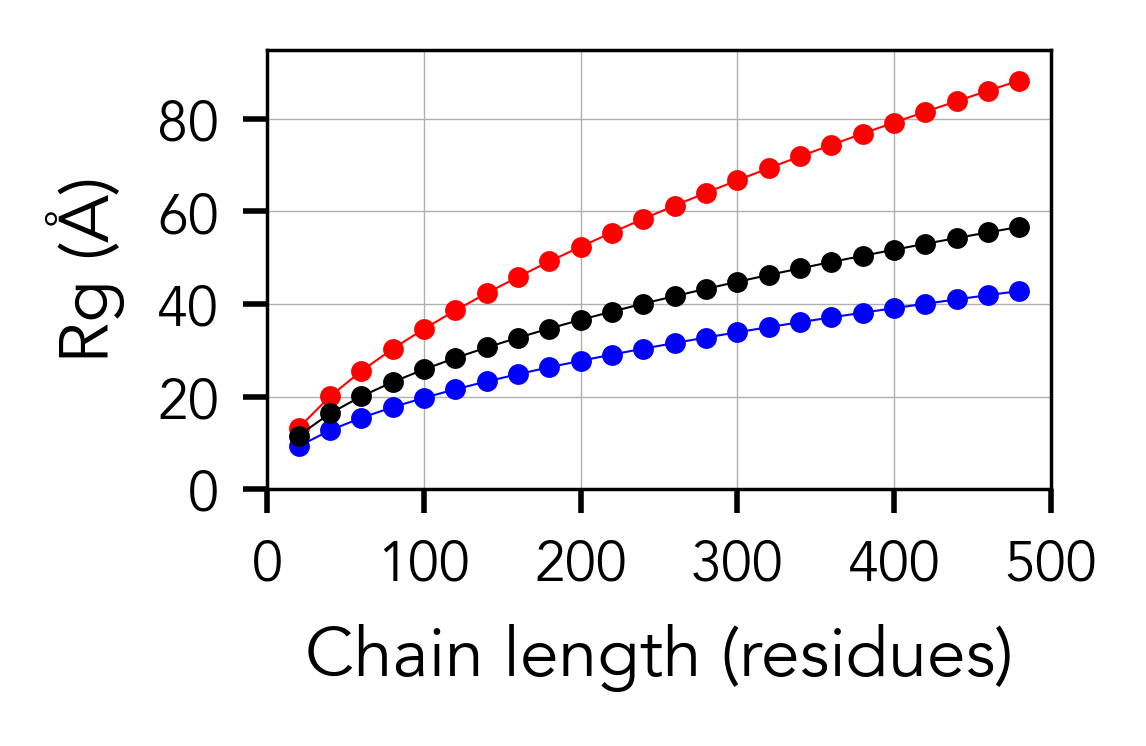

In [7]:
fig = figure(num=None, figsize=(2.4, 1.6), dpi=250, facecolor='w', edgecolor='k')
plt.plot(LENGTHS, RG_SAW,'o-',linewidth=0.3, ms=2,color='r')
plt.plot(LENGTHS, RG_WLC,'o-',linewidth=0.3, ms=2,color='b')
plt.plot(LENGTHS, RG_AFRC,'o-',linewidth=0.3, ms=2,color='k')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim([0,95])
plt.yticks([0,20,40,60,80])
plt.xticks([0,100,200,300,400,500])
plt.xlim([0,500])
plt.xlabel('Chain length (residues)')
plt.ylabel('Rg (Å)')
plt.grid(linewidth=0.2, which='both')
plt.tight_layout()
plt.savefig('rg_vs_models.pdf')

meta NOT subset; don't know how to subset; dropped


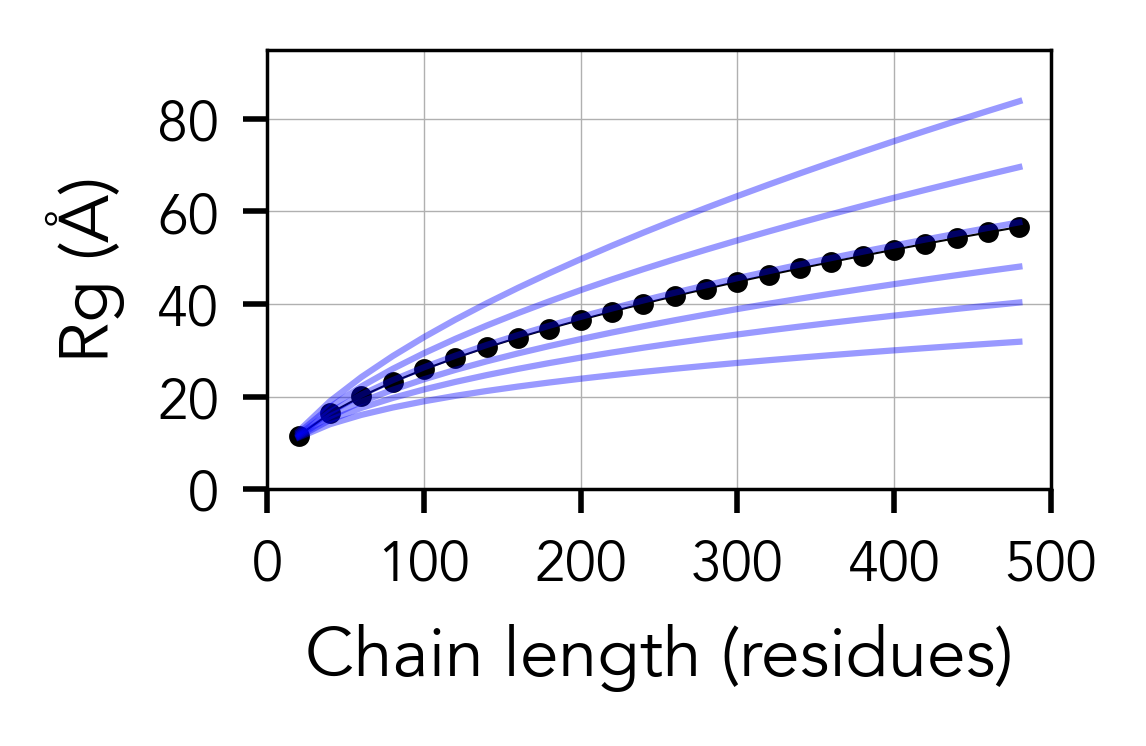

In [8]:
fig = figure(num=None, figsize=(2.4, 1.6), dpi=250, facecolor='w', edgecolor='k')
plt.plot(LENGTHS, RG_AFRC,'o-',linewidth=0.3, ms=2,color='k')

for nu in NUs:
    plt.plot(LENGTHS, NU2RG[nu],'-',linewidth=0.9, ms=2,color='b', alpha=0.4)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim([0,95])
plt.yticks([0,20,40,60,80])
plt.xticks([0,100,200,300,400,500])
plt.xlim([0,500])
plt.xlabel('Chain length (residues)')
plt.ylabel('Rg (Å)')
plt.grid(linewidth=0.2, which='both')
plt.tight_layout()
plt.savefig('rg_vs_nu.pdf')

In [9]:
RG_AFRC_nu = np.polyfit(np.log(LENGTHS), np.log(RG_AFRC),1)[0]
RG_WLC_nu = np.polyfit(np.log(LENGTHS), np.log(RG_WLC),1)[0]
RG_SAW_nu = np.polyfit(np.log(LENGTHS), np.log(RG_SAW),1)[0]
print(f"AFRC Rg scaling: {RG_AFRC_nu}")
print(f"WLC Rg scaling: {RG_WLC_nu}")
print(f"SAW Rg scaling: {RG_SAW_nu}")


for nu in NUs:
    print(f"SAW-nu ({nu}) Rg scaling: {np.polyfit(np.log(LENGTHS), np.log(NU2RG[nu]),1)[0]}")



AFRC Rg scaling: 0.5000002806344915
WLC Rg scaling: 0.48650571958353195
SAW Rg scaling: 0.5973802012529508
SAW-nu (0.33) Rg scaling: 0.3300000536984796
SAW-nu (0.4) Rg scaling: 0.40000004374762493
SAW-nu (0.45) Rg scaling: 0.4500000422881461
SAW-nu (0.5) Rg scaling: 0.4999999998346137
SAW-nu (0.55) Rg scaling: 0.5499924640957758
SAW-nu (0.598) Rg scaling: 0.5977068547072586
